## Logistic Regression for malignancy prediction in cancer

#### Logistic Regression,a Supervised Learning model is used for predicting discrete-valued outputs.

## Dataset Used
 “Breast Cancer Wisconsin (Diagnostic)” (WBCD) dataset, provided by the University of Wisconsin, and hosted by the UCI, Machine Learning Repository.
 https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
 
* The dataset comprises of 30 characteristics of individual cells of breast cancer obtained from a minimally invasive fine needle aspirate (FNA), to discriminate benign from malignant lumps of a breast mass, using Machine Learning.

## Step 1: Import packages

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
import scipy.optimize as op 
import seaborn as sns
from __future__ import division

## Step 2: Load Dataset

In [5]:

# Read data from file 'wsbc.data.csv' 
# and create a pandas DataFrame containing the WDBC data.

df = pd.read_csv("CANCER_data.csv")
df

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension,...,W_Texture,W_Perimeter,W_Area,W_Smoothness,W_Compactness,W_Concavity,W_Concave_points,W_Symmetry,W_fractal_dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


## Step 3: Data Visualization .

Now that we have a DataFrame containing our data, we want to identify which of the 30 features are important for our prediction model. Selecting the best features of a dataset is a critical step in Machine Learning, to get a useful classification and to avoiding a predictive bias.

In [6]:
df_new=df[['Radius','Texture' ,'Smoothness' ,'Compactness','Concavity', 'Diagnosis']]

In [7]:
#sns.set(style="ticks", color_codes=True)
#g = sns.pairplot(df, palette = ('b', 'r'), hue="Diagnosis", height=2.5)
#plt.show()

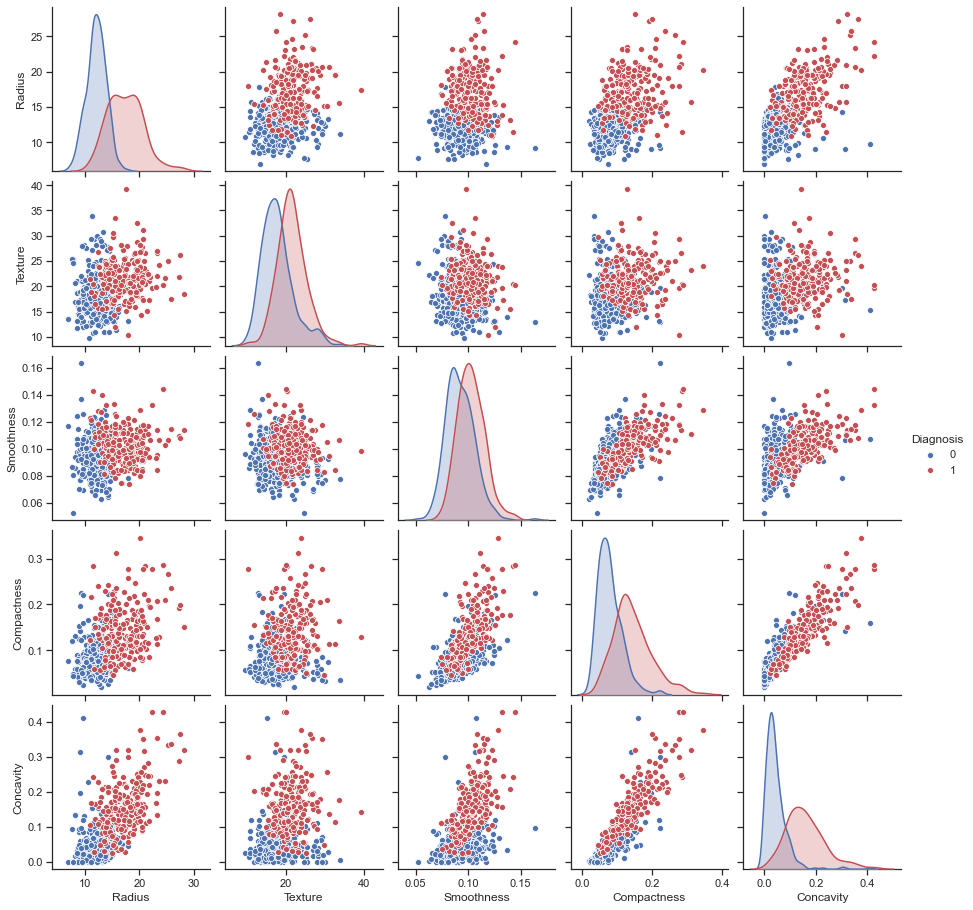

In [8]:
# sns is a seaborn object

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_new, palette = ('b', 'r'), hue="Diagnosis", height=2.5)
plt.show()

specifying the argument “hue = Diagnosis,” the pairplot method has access to the df column containing the Diagnosis values (0, 1). Moreover, pairplot will use the argument “palette” to color points with b blue or r red basing on the Diagnosis values.

* Some of these pairs, like Radius vs. Texture or Perimeter vs. Smoothness, have a right separation level concerning the Diagnosis (blue points = Benign; red spots = Malignant). Visualizing features in plots of pairs represent an excellent tool

## Step 4: Logistic Regression Hypothesis Model

![alt text](step4.jpg "Title")

![alt text](hypothesis.png )

The Logistic Regression Hypothesis model in Equation 1, looks similar to that of the Linear Regression. But the real difference is in the g function that uses the product of the translated θ vector with the x vector (we will call this product z) as an argument. The g function is defined as in Equation 2:

![alt text](hypothesis.png )

![alt text](eq2.png )

#### The g(z) function, which is a sigmoid function (Logistic Function) is non-linear. It calculates the probability that the Diagnosis output can be 0 or 1

#### code for sigmoid function

In [9]:
# The Logistic Function
def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

## Step 5: The Cost Function

![alt text](cost.png )

Concretely, we cannot use the Linear Regression Cost Function for the Logistic. The non-linearity of the sigmoid function, which handles hθ(x), leads to a J(θ) having a non-convex pattern, and it will look like the curve in the graph 

![alt text](graph.png )

#### This non-convex J(θ) is a function with many local optima. It’s not guaranteed that the Gradient descent will converge to the global minimum. What we want is a convex J(θ) like that in Figure 7B, which is a function that converges to the global minimum. So, we have to write the Cost Function in a way that guarantees a convex J(θ):

![alt text](LR_cost.png )

![alt text](graph2.png )

Because we have two binary conditions for the Benign or Malignant outcome (y), the Cost Function in Equation 4 states the cost of our Hypothesis prediction concerning y is.
If y = 1, but we predict hθ(x) = 0, we will penalize the learning algorithm by a considerable cost  because, in this case, the cost will tend to infinite. Instead, if our prediction is hθ(x) = 1, (thus equal to y), then the cost is going to be 0.
In the case of y = 0, we have the opposite: if y = 0 and we predict hθ(x) = 0, the cost is going to be 0, because our Hypothesis matches with y, while if our prediction is hθ(x) = 1, we end up paying a very large cost.

![alt text](simple_cost.png )

In [10]:
# Logistic Regression Cost Function
def calcCostFunction(theta, X, y):
    
    # number of training examples
    m,n = X.shape  
    
    # Calculate h = X * theta (we are using vectorized version)
    h = X.dot(theta) 
    
    # Calculate the Cost J
    J = -(np.sum(y * np.log(sigmoid(h)) + (1 - y) * np.log(1 - sigmoid(h)))/m)
    return J

## Step 6: The Gradient Function and its optimization

Gradient Descent, which is an algorithm that calculates the derivative of the Cost Function, updating the vector θ by mean of the parameter α, that is the learning rate.Generalizing, an optimization algorithm will repeat until it will converge. Importantly: the updating of θ always has to be simultaneous.

![alt text](GD.png)

## The equation for the vectorized implementation of the Gradient Function is:

![alt text](GD_vector.png)

In [11]:
# The Gradient Function
def calcGradient(theta, X, y):
    
    # number of training examples
    m,n = X.shape    
    
    # Calculate h = X * theta
    h = X.dot(theta)
    
    # Calculate the error = (h - y)
    error = sigmoid(h) - y
    
    # Calculate the new theta
    gradient = 1/m * (X.T).dot(error)
    
    return gradient

## Step 7: Feature Scaling and Normalization

In [12]:
# The Feature Scaling and Normalization
# for two variables

def FeatureScalingNormalization(X):
    # Initialize the following variables:
    # Make a copy of the X vector and call it X_norm
    X_norm = X 

    # Initialize mu: It will contain the average 
    # value of X in training set.
    mu = np.zeros(X.shape[1]) 
    
    # Initialize sigma: It will contain the Range(max-min)
    # of X or Standard Deviation
    sigma = np.zeros(X.shape[1]) 

    # mu (mean)
    mu = np.vstack((X[0].mean(), \
                    X[1].mean()))

    # The Standard Deviation calculation with NumPy,
    # requires the argument "degrees of freedom" = 1
    sigma = np.vstack((X[0].std(ddof=1),\
                       X[1].std(ddof=1)))     

    # Number of training examples
    m = X.shape[1] 
    
    # Make a vector of size m with the mu values
    mu_matrix = np.multiply(np.ones(m), mu).T 
    
    # Make a vector of size m with the sigma values    
    sigma_matrix = np.multiply(np.ones(m), sigma).T
    
    # Apply the Feature Scaling Normalization formula
    X_norm = np.subtract(X, mu).T
    X_norm = X_norm /sigma.T
    
    return [X_norm, mu, sigma]

## Step 8: Calculate the accuracy

In [13]:
# Calculate the accuracy
def CalcAccuracy(theta, X):
    p = sigmoid(X.dot(theta)) >= 0.5
    return p

## Step 9: Implementing the Logistic Regression with two variables

Now we will write the code that wraps all of these functions, to predict outcomes of Malignancy based on two of the 20 not-redundant features of our dataset. For the choice of the features, we could refer to one of the pairs that we have found in Step 3, Radius, and Texture, which have a correlation score = 0.32. The following code produces the features numpy array X and the output numpy vector y, from the DataFrame df:


In [14]:
# Make the X and y numpy arrays,
# containing the values of
# Radius and Texture
X = np.vstack((np.asarray(df.Radius.values), \
               np.asarray(df.Texture.values)))
y = np.asarray(df.Diagnosis.values)

Text(0, 0.5, 'Texture')

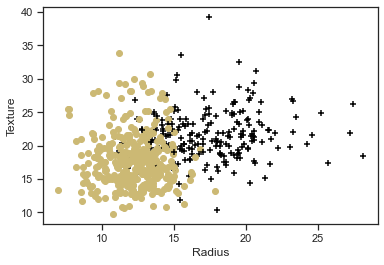

In [15]:
# Plot the data
for i in range(len(y)):
    if y[i]==0.0:
        c = 'y'
        m = u'o'
    if y[i]==1.0:
        c = 'black'
        m = u'+'
    plt.scatter(X[0][i], X[1][i], color=c, marker=m)
    
# Put labels
plt.xlabel(df.columns[df.columns.get_loc("Radius")])
plt.ylabel(df.columns[df.columns.get_loc("Texture")])


## The yellow dots represent the Benigns, the blacks, the Malignants.

Now let’s Normalize and Scale, our data. Also, we need collecting the mu, which is the average values of X in our training set, and sigma that is the Standard Deviation. In a new notebook cell, let’s type:

In [16]:
# Normalize X using the FeatureScalingNormalization function, and 
# copy the results in the "featuresNormalizeresults" list
featuresNormalizeresults = FeatureScalingNormalization(X)

# get the normalized X matrix
X = np.asarray(featuresNormalizeresults[0]).T

# get the mean
mu = featuresNormalizeresults[1]

# get the sigma
sigma = featuresNormalizeresults[2]

Now, we have to update the array X adding a column of “ones,” with the method .vstack:

In [17]:
# Add a column of 'ones' to X

# number of training examples
m = len(y) 

# number of features
n = len(X)

# Add a column of ones to the X matrix
X = np.vstack((np.ones(m), X)).T

## Testing
Let’s do some tests: in order to test our code, let’s try to calculate the Cost Function and the Gradient, starting with a θ = [0, 0, 0]:

In [18]:
# First test: Compute cost and gradient, 
# and display the updated theta starting with initial theta = [0, 0, 0]

initial_theta = np.zeros(n+1); # set theta = [0, 0, 0]

print ("J", calcCostFunction(theta=initial_theta, X=X, y=y))
print ("grad", calcGradient(theta=initial_theta, X=X, y=y))

J 0.6931471805599453
grad [ 0.12741652 -0.35265304 -0.20056252]


#### The new θ vector is now = [ 0.12741652, -0.35265304, -0.20056252], with an associated J(θ) = 0.69.

Also, we can try non-zero values of θ, and see what happens:


In [19]:
# Second test: Compute cost and gradient, 
# and display the updated theta starting with a non-zero theta

test_theta = [-24, 1.2, 0.2];

print ("J", calcCostFunction(theta=initial_theta, X=X, y=y))
print ("grad", calcGradient(theta=initial_theta, X=X, y=y))

J 0.6931471805599453
grad [ 0.12741652 -0.35265304 -0.20056252]


#### The updated θ vector now is = [-0.37258348, -0.35265304, -0.20056252], with an associated J(θ) = 8.48.

## Gradient Descent Advanced Optimization
The optimization algorithm that we will use for finding θ is the BFGS

In [20]:
# Gradient Descent Advanced Optimization: BFGS
# Update and find the optimal theta
m , n = X.shape;
initial_theta = np.zeros(n);
Result = op.minimize(fun = calcCostFunction, 
                                 x0 = initial_theta, 
                                 args = (X, y),
                                 method = 'BFGS',
                                 jac = calcGradient);
theta = Result.x;
Result

      fun: 0.2558201286363281
 hess_inv: array([[12.66527269, -1.22908954, -2.82539649],
       [-1.22908954, 71.16261306,  7.07658929],
       [-2.82539649,  7.07658929, 13.39777084]])
      jac: array([7.36409258e-07, 3.24760454e-08, 9.55291040e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 19
     njev: 20
   status: 0
  success: True
        x: array([-0.70755981,  3.72528774,  0.93824469])

## Decision Boundary
The BFGS algorithm has found θ = [-0.70755981, 3.72528774, 0.93824469], corresponding to a vector containing the Result.x argument, of the scypy.minimize function. In Step 3, we mentioned that, for Logistic Regression, the Hypothesis hθ(x) calculates the probability that the output can be 0 or 1. To map this probability to a discrete class (Bening/Malignant), we select a threshold that is 0.5 above which we will classify values as “1” and below which we classify values as “0”. So, what we want to do is tracking the so-called Decision Boundary. A Decision Boundary is a property of the Hypothesis and its parameters θ, and not a property of the dataset. Let’s plot the Radius and Texture features again, but with the adding of a red line, that represents the Decision Boundary for the found θ:

In [23]:
X.T[1].min()+1

-1.027863997439543

Text(0, 0.5, 'Texture')

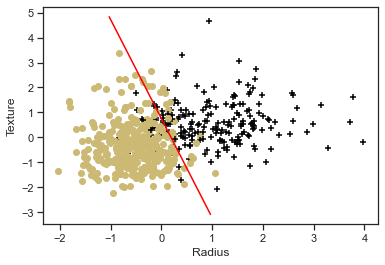

In [60]:
# Plot the data with the 
# Logistic Regression Decision Boundary

# Create a plot set
plot_x = np.asarray([X.T[1].min()+1, X.T[1].max()-3])

# Calculate the Decision Boundary
plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])

for i in range(len(y)):
    if y[i]==0.0:
        c = 'y'
        m = u'o'
    if y[i]==1.0:
        c = 'black'
        m = u'+'
    plt.scatter(X.T[1][i], X.T[2][i], color=c, marker=m) 
    
# Plot the Decision Boundary (red line)
plt.plot(plot_x, plot_y, color='red')

# Put labels
plt.xlabel(df.columns[df.columns.get_loc("Radius")])
plt.ylabel(df.columns[df.columns.get_loc("Texture")])

## Calculate the accuracy
Now we want to calculate the accuracy of our algorithm. The function CalcAccuracy described in Step 8 will do this job:

In [62]:
# Calculate accuracy
p = CalcAccuracy(theta, X)
p = (p == y) * 100
print ("Train Accuracy:", p.mean())

Train Accuracy: 89.103690685413


## Make a prediction
Now that we have tested our algorithm and evaluated its accuracy, we want to make predictions. The following code represents a possible example of a Query: we want to know what is the outcome for a Radius = 18.00 and a Texture = 10.12:

In [64]:
# Perform a Query:
# Predict the risk of malignancy for Radius = 18.00 and Texture = 10.12

query = np.asarray([1, 18.00, 10.12])

# Scale and Normalize the query
query_Normalized = \
np.asarray([1, ((query[1]-float(mu[0]))/float(sigma[0])),\
                               ((query[2]-float(mu[1]))/float(sigma[1]))])


prediction = sigmoid(query_Normalized.dot(theta));
prediction

0.7999520268226944

Note that we have to normalize the Query with mu and sigma for the Scaling and Normalization. The outcome predicted is 0.79, which means that for a Radius = 18 and a Texture =10.12, the risk of malignancy is nearby to 1.

## Step 10: How to adapt the code for Multiple Variables
In this step, we will modify the previous code for the handling of multiple variables. There are few things to update: the first concerns the Feature Scaling and Normalization function:

In [65]:
def FeatureScalingNormalizationMultipleVariables(X):
    # N.B.: this code is adapted for multiple variables
    
    # Initialize the following variables:
    # Make a copy of the X vector and call it X_norm
    X_norm = X 

    # mu: It will contain the average 
    # value of X in training set.
    mu = np.zeros(X.shape[1]) 
    

    # sigma: It will contain the Range(max-min)
    # of X or Standard Deviation
    sigma = np.zeros(X.shape[1]) 

    mu = np.vstack((X[0].mean(), \
                    X[1].mean(), \
                    X[2].mean()))
    # The Standard Deviation calculation with NumPy,
    # requires the argument "degrees of freedom" = 1
    sigma = np.vstack((X[0].std(ddof=1),\
                       X[1].std(ddof=1),\
                       X[2].std(ddof=1)))     

    # number of training examples
    m = X.shape[1] 
    
    # Make a vector of size m with the mu values
    mu_matrix = np.multiply(np.ones(m), mu).T 
    
    # Make a vector of size m with the sigma values    
    sigma_matrix = np.multiply(np.ones(m), sigma).T
    
    # Apply the Feature Scaling Normalization formula
    X_norm = np.subtract(X, mu).T
    X_norm = X_norm /sigma.T
    
    return [X_norm, mu, sigma]

Other minor revisions concern the code for uploading the X vector and the code for the Query. The following code reassembles what we have done until now, extending all the functions to the use of the Logistic Regression with multiple variables.

In [67]:
# Read data from file 'wsbc.data.csv' 
# Make a pandas DataFrame "df" 
# containing the wdbc data.
df = pd.read_csv("CANCER_data.csv") 

# Make the X and y numpy arrays 
# N.B.: update this code for multiple variables
X = np.vstack((np.asarray(df.Radius.values), \
               np.asarray(df.Texture.values),\
               np.asarray(df.W_Concave_points.values)))

y = np.asarray(df.Diagnosis.values)

# Normalize X using the FeatureScalingNormalizationMultipleVariables function, and 
# copy the results in the "featuresNormalizeresults" list
featuresNormalizeresults = FeatureScalingNormalizationMultipleVariables(X)

# get the normalized X matrix
X = np.asarray(featuresNormalizeresults[0]).T

# get the mean
mu = featuresNormalizeresults[1]

# get the sigma
sigma = featuresNormalizeresults[2]

# number of training examples
m = len(y) 

# number of features
n = len(X)

# Add a column of ones to the array/matrix X ad add a column of '1's
X = np.vstack((np.ones(m), X)).T

# Gradient Descent Advanced Optimization: Update and find the optimal theta
m , n = X.shape;
initial_theta = np.zeros(n);
Result = op.minimize(fun = calcCostFunction, 
                                 x0 = initial_theta, 
                                 args = (X, y),
                                 method = 'BFGS',
                                 jac = calcGradient);
theta = Result.x;
message = Result.message



# Perform a Query:
# Predict the risk of malignancy for: 
# Radius = 5.00, Texture = 1.10, and W_Concave_points = 0.4
# N.B.: update this code for multiple variables
query = np.asarray([1, 5.00, 1.10, 0.4])

# Scale and Normalize the query
query_Normalized = np.asarray([1, ((query[1]-float(mu[0]))/float(sigma[0])),\
                               ((query[2]-float(mu[1]))/float(sigma[1])),\
                               ((query[3]-float(mu[2]))/float(sigma[2]))])

# Calculate the prediction using the Logistic Function
prediction = sigmoid(query_Normalized.dot(theta));

# Calculate accuracy
p = CalcAccuracy(theta, X)
p = (p == y) * 100

# Print the output
print(str("Your Query is: "+str(query.tolist()[1:])[1:-1]))
print(str("BFGS Message: "+str(message)))
print(str("Theta found: "+str(theta)[1:-1]))
print(str("Train Accuracy: "+str(p.mean())))
print(str("Prediction: "+str(prediction)))

Your Query is: 5.0, 1.1, 0.4
BFGS Message: Optimization terminated successfully.
Theta found: -1.40776926  3.13487429  1.52552603  4.02250701
Train Accuracy: 95.43057996485061
Prediction: 0.8154762110038783


The above code will predict the risk of malignancy for: Radius = 5.00, Texture = 1.10, and W_Concave_points = 0.4.